23_24

In [1]:
# importación de datos
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:

# separamos datos de entrada y salida
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.33, random_state=1)


In [3]:
# 1. elegimos clasificador
from sklearn.naive_bayes import MultinomialNB
# 2. instanciamos el modelo
model = MultinomialNB()
# 3. Entrenamiento con los datos
model.fit(Xtrain, ytrain)

MultinomialNB()

In [4]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)
y_model

array(['setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica'],
      dtype='<U10')

In [5]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo


0.64

In [6]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    accuracy = accuracy_score(y_true, y_pred)

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap='Purples')
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            
            
    ax.text(0.5, -0.4, f'Accuracy: {accuracy:.2%}', ha='center', transform=ax.transAxes)
    
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, x=0.6, y=1.05, ha='center')
    return ax

In [7]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
ytest_df

,species
14,0
98,1
75,1
16,0
131,2
56,1
141,2
44,0
29,0
120,2


In [8]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

array([0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 2], dtype=int64)

Confusion matrix, without normalization
[[17  0  0]
 [ 0  1 18]
 [ 0  0 14]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

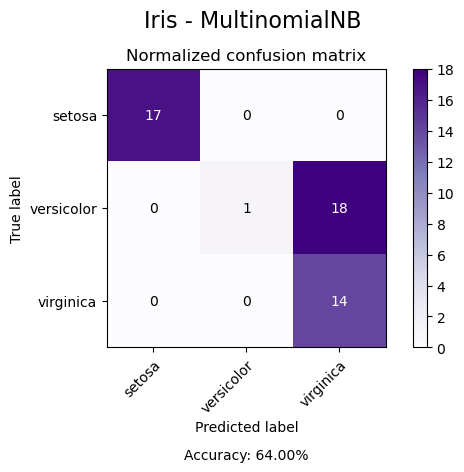

In [9]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='Iris - MultinomialNB')